# Lab 2.02 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02.  Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

In [3]:
android = pd.read_csv('../data/android_persistence_cpu.csv',delimiter=";") # of sep=';
print(android.head())
android.PersistenceType = android.PersistenceType.astype('category')
android.DataSize = android.DataSize.astype(CategoricalDtype(categories=['Small', 'Medium', 'Large'], ordered=True))

   Time    PersistenceType DataSize
0  1.81  Sharedpreferences    Small
1  1.35  Sharedpreferences    Small
2  1.84  Sharedpreferences    Small
3  1.54  Sharedpreferences    Small
4  1.81  Sharedpreferences    Small


Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.

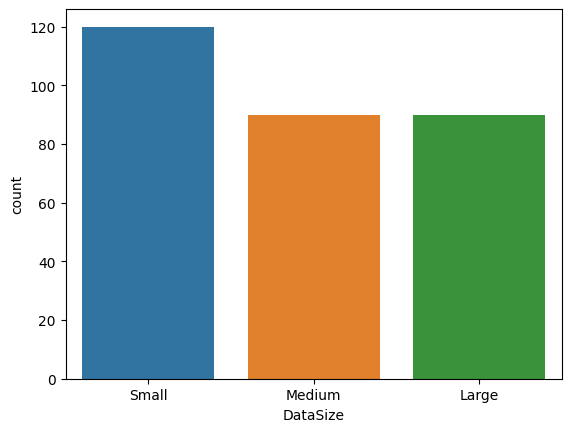

In [4]:
sns.countplot(data=android,x = "DataSize");

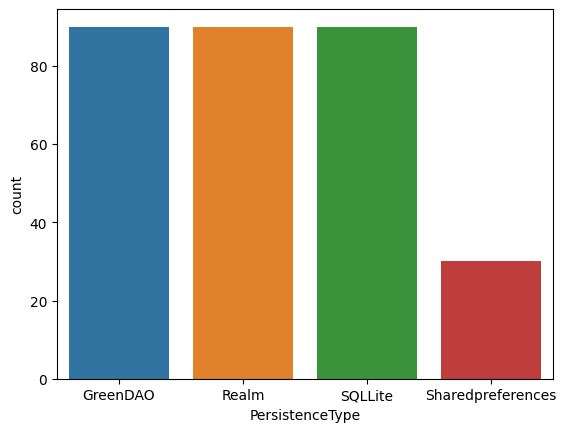

In [5]:
sns.countplot(data=android,x = "PersistenceType");

How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!

<Axes: xlabel='DataSize', ylabel='count'>

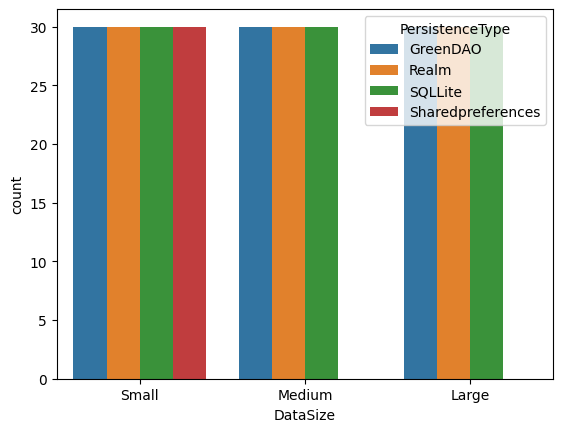

In [11]:
sns.countplot(data=android,x="DataSize",hue="PersistenceType")

Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
- Then grouped according to `DataSize` (parameter `y`)
- Finally, split it according to `PersistenceType` (parameter `hue`)

<Axes: xlabel='Time'>

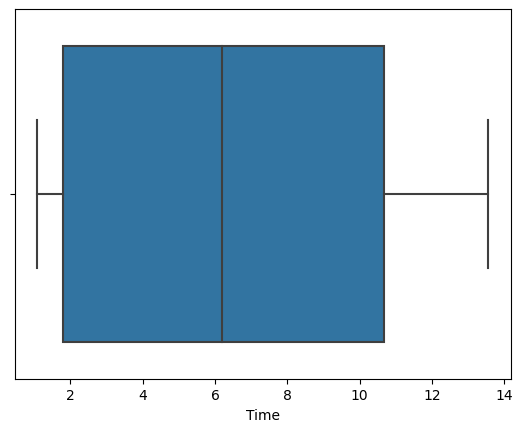

In [12]:
sns.boxplot(data = android, x = "Time")

<Axes: xlabel='Time', ylabel='DataSize'>

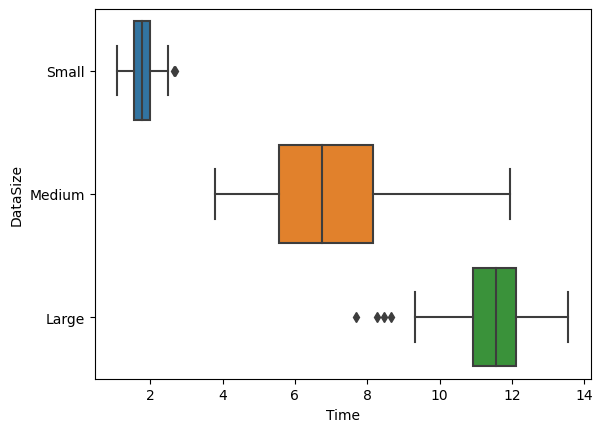

In [13]:
sns.boxplot(data = android, x = "Time",y="DataSize")

<Axes: xlabel='Time', ylabel='DataSize'>

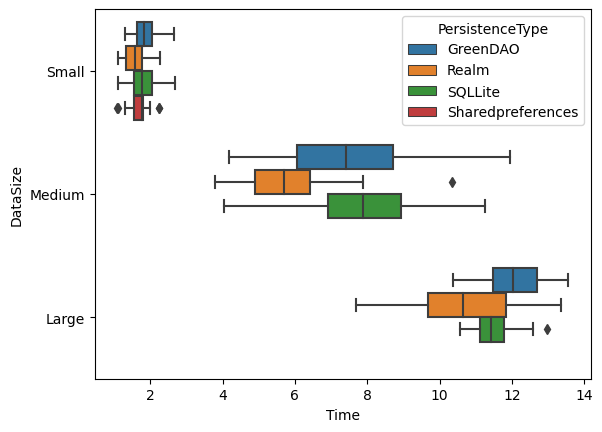

In [14]:
sns.boxplot(data = android, x = "Time",y="DataSize",hue="PersistenceType")

**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)

Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`

In [17]:
rnt = android['Time']
print(np.std(rnt, ddof=1))
print(np.mean(rnt))

4.229598639871586
6.230833333333333


In [28]:
rnt = android.groupby(android.DataSize)["Time"]
print(rnt.describe())

          count       mean       std   min      25%     50%      75%    max
DataSize                                                                   
Small     120.0   1.741333  0.358625  1.09   1.5500   1.770   1.9800   2.68
Medium     90.0   7.022000  1.864335  3.79   5.5625   6.760   8.1675  11.94
Large      90.0  11.425667  1.163785  7.68  10.9250  11.555  12.1175  13.56


In [29]:
rnt = android.groupby(android.PersistenceType)["Time"]
print(rnt.describe())

                   count      mean       std   min    25%    50%      75%  \
PersistenceType                                                             
GreenDAO            90.0  7.152667  4.385917  1.31  2.095  7.425  11.5725   
Realm               90.0  6.022889  3.884175  1.12  1.780  5.690   9.7300   
SQLLite             90.0  7.036000  4.146336  1.10  2.085  7.875  11.1325   
Sharedpreferences   30.0  1.673667  0.285192  1.09  1.545  1.770   1.8100   

                     max  
PersistenceType           
GreenDAO           13.56  
Realm              13.36  
SQLLite            12.96  
Sharedpreferences   2.23  


In [30]:
rnt = android.groupby([android.PersistenceType,android.DataSize])["Time"]
print(rnt.describe())

                            count       mean       std    min      25%  \
PersistenceType   DataSize                                               
GreenDAO          Small      30.0   1.893667  0.347905   1.31   1.6450   
                  Medium     30.0   7.454000  2.007358   4.18   6.0700   
                  Large      30.0  12.110333  0.868461  10.38  11.4775   
Realm             Small      30.0   1.599000  0.314986   1.12   1.3425   
                  Medium     30.0   5.818000  1.330951   3.79   4.8925   
                  Large      30.0  10.651667  1.405990   7.68   9.6700   
SQLLite           Small      30.0   1.799000  0.415960   1.10   1.5625   
                  Medium     30.0   7.794000  1.599007   4.04   6.9075   
                  Large      30.0  11.515000  0.559142  10.58  11.1175   
Sharedpreferences Small      30.0   1.673667  0.285192   1.09   1.5450   

                               50%      75%    max  
PersistenceType   DataSize                          
Green

## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
